In [4]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluación - Regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Evaluación - Clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Validación cruzada y búsqueda de hiperparámetros
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.model_selection import learning_curve
from scipy.stats import uniform
from scipy.stats import randint
import pandas as pd

pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv("datos_limpios.csv")
df.info

<bound method DataFrame.info of                                        mbid  \
0      50971422-fed2-47ad-9a6f-eacf64ebb965   
1      76c66068-5d89-45c2-92be-22f7562dfa3c   
2      e9da3272-429d-41a2-b84d-b0c09b99a286   
3      86f3c7ed-ad1b-4fc8-9679-a89fb2a50435   
4      9c45c16f-addc-4a53-ad2b-f5481556bfcb   
...                                     ...   
58553  a97def93-bc18-4090-bc1f-6f1cfad084d4   
58554  d9205300-9df7-41a4-be67-0c69d62c4821   
58555  2d71ea0b-2951-42ff-b1d1-1db9835eea53   
58556  947c6b9b-42b3-4c5e-a3cb-963f02988fe8   
58557  360e53c9-17a8-45bf-af82-b4658af65e29   

                                                   title  \
0                 shades of green (utah saints 7″ remix)   
1                                           mr. pleasant   
2                                                    118   
3                              someday somewhere somehow   
4                                           folie á deux   
...                                        

In [6]:
df_limpio = df.drop(columns=[      'year',
                                    'high_genre_dortmund_value',
                                    'high_genre_dortmund_probability',
                                    'high_genre_electronic_probability',
                                    'high_genre_rosamerica_value',
                                    'high_genre_rosamerica_probability',
                                    'high_genre_tzanetakis_value',
                                    'high_genre_tzanetakis_probability',
                                    'high_ismir04_rhythm_value',
                                    'high_ismir04_rhythm_probability',
                                    'low_chords_number_rate',
                                    'low_tuning_nontempered_energy_ratio',
                                    'low_tuning_diatonic_strength',
                                    'low_tuning_equal_tempered_deviation',
                                    'release_year',
                                    'high_genre_electronic_value_dnb',
                                    'high_genre_electronic_value_house',
                                    'high_genre_electronic_value_techno',
                                    'high_genre_electronic_value_trance',
])


In [7]:
X = df_limpio.drop(columns=['popularity', "title", "artist", "mbid"])
y = df_limpio['popularity']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)


In [9]:
import joblib


best_lgbm = LGBMRegressor(
    colsample_bytree=0.5909,
    learning_rate=0.0467,
    max_depth=10,
    min_child_samples=50,
    n_estimators=250,
    num_leaves=40,
    reg_alpha=0.8,
    reg_lambda=0.8,
    subsample=0.5233,
    random_state=42
)

best_lgbm.fit(X_train, y_train)
joblib.dump(best_lgbm, './models/best_lgbm_model_new.pkl')
#y_pred_train = best_lgbm.predict(X_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9903
[LightGBM] [Info] Number of data points in the train set: 35134, number of used features: 66
[LightGBM] [Info] Start training from score 0.000334


['./models/best_lgbm_model_new.pkl']

In [ ]:
#Predict
data_preproc = {
'duration_ms': 0.009655303030303031,
'high_danceability_probability': -0.4314210039439218,
'high_gender_value': 1,
'high_gender_probability': -1.1739096453396154,
'high_mood_acoustic_value': 0,
'high_mood_acoustic_probability': -2.680239103255699,
'high_mood_aggressive_value': 0,
'high_mood_aggressive_probability': 0.3632218830603862,
'high_mood_electronic_value': 1,
'high_mood_electronic_probability': -1.8963439966519118,
'high_mood_happy_value': 0,
'high_mood_happy_probability': 1.2644737417230596,
'high_mood_party_value': 0,
'high_mood_party_probability': 0.8151164197118346,
'high_mood_relaxed_value': 1,
'high_mood_relaxed_probability': 0.8661900272622914,
'high_mood_sad_value': 1,
'high_mood_sad_probability': 0.22495214321510032,
'high_moods_mirex_probability': -0.3435771300661087,
'high_timbre_value': 1,
'high_timbre_probability': -2.3697736569845067,
'high_tonal_atonal_value': 0,
'high_tonal_atonal_probability': -0.19207893707959744,
'high_voice_instrumental_value': 0,
'high_voice_instrumental_probability': 0.1103725211961826,
'low_average_loudness': 40.26743533922041,
'low_dynamic_complexity': -1.9809512435436634,
'low_mfcc_mean_0': -1.095809042556172,
'low_mfcc_mean_1': 2.0612326421792235,
'low_mfcc_mean_2': -1.350842439658929,
'low_mfcc_mean_3': -1.9431641592483637,
'low_mfcc_mean_4': 0.06553370200265567,
'low_mfcc_mean_5': 0.7107661898553455,
'low_mfcc_mean_6': -0.9319294003552996,
'low_mfcc_mean_7': -0.7662390214141556,
'low_mfcc_mean_8': -0.05917812099292599,
'low_mfcc_mean_9': 0.6760477572893601,
'low_mfcc_mean_10': 0.09083086876058569,
'low_mfcc_mean_11': -0.787968129662126,
'low_mfcc_mean_12': -0.935385427317495,
'audio_sample_rate': -0.11631218314862544,
'audio_codec': 1,
'audio_bit_rate': -0.9757256923665925,
'audio_equal_loudness': 0.0,
'audio_analysis_sample_rate': 0.0,
'audio_length': -1.4490782043590138,
'audio_replay_gain': 2.074059542075326,
'audio_downmix': 0,
'audio_lossless': False,
'low_key_key': 1,
'low_key_scale': 0,
'low_key_strength': 1.212909602764592,
'low_chords_scale': 1,
'low_chords_changes_rate': -0.43262238173833883,
'low_chords_key': 1,
'low_tuning_frequency': 2.6677143668008143,
'low_danceability': -0.2422198370861224,
'low_onset_rate': -0.21313971624556619,
'low_bpm': 1.215890629038466,
'low_beats_count': -1.3128873149675293,
'danceability_encoded': -0.9367572621767687,
'high_moods_mirex_value_Cluster2': 0,
'high_moods_mirex_value_Cluster3': True,
'high_moods_mirex_value_Cluster4': 0,
'high_moods_mirex_value_Cluster5': 0,
'genre_electronic': 0,
'genre_hip hop': True,
'genre_pop': 0,
'genre_rock': 0
}
X = pd.DataFrame([data_preproc])
prediction = best_lgbm.predict(X)
print(prediction[0])


-0.36515976937346556


In [7]:
# Modelos de Regresion
def evaluar_modelos_regresion(X_train, y_train, X_val, y_val):
    modelos_reg = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42)
    }

    # Escalar datos
    modelos_escalados = ["LinearRegression", "Ridge", "Lasso"]
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    resultados_reg = {}

    for name , model in modelos_reg.items():
        if name in modelos_escalados:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_val_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)


        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = root_mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        resultados_reg[name] = {
            "MSE": round(mse, 4),
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4),
            "R2": round(r2, 4)
        }

    return pd.DataFrame(resultados_reg).T.sort_values("MSE")

In [28]:
evaluar_modelos_regresion(X_train, y_train, X_val, y_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9648
[LightGBM] [Info] Number of data points in the train set: 35134, number of used features: 65
[LightGBM] [Info] Start training from score 0.000334


,MSE,MAE,RMSE,R2
RandomForest,0.7527,0.6982,0.8676,0.2462
LightGBM,0.7530,0.6958,0.8678,0.2459
XGBoost,0.7767,0.6998,0.8813,0.2222
GradientBoosting,0.7893,0.7152,0.8884,0.2096
LinearRegression,0.8547,0.7468,0.9245,0.1441
Ridge,0.8547,0.7468,0.9245,0.1441
Lasso,0.9986,0.8187,0.9993,-0.0000


In [31]:
# RandomSearch para hiperparametros
def randomsearch_modelo(modelo, tipo_modelo, param_dist, X_train, y_train, X_val, y_val, scoring, n_iter=20, cv=3, random_state=42):
    search = RandomizedSearchCV(
        estimator=modelo,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        random_state=random_state,
        verbose=1
    )
    search.fit(X_train, y_train)

    print("Mejores hiperparametros:", search.best_params_)
    print("Mejor score:", search.best_score_)

    best_model = search.best_estimator_
    y_val_pred = best_model.predict(X_val)

    print("Metricas:")

    if tipo_modelo == "clasificacion":
        acc = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
        rec = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1 Score : {f1:.4f}")

        metricas = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1
        }

    elif tipo_modelo == "regresion":
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)

        print(f"MSE  : {mse:.4f}")
        print(f"RMSE : {rmse:.4f}")
        print(f"MAE  : {mae:.4f}")
        print(f"R2   : {r2:.4f}")

        metricas = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        }

    return best_model, metricas

In [32]:
param_dist_lgbm = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 100),
    'max_depth': randint(3, 15),
    'min_child_samples': randint(5, 30),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

best_model_lgbm, metricas_lgbm = randomsearch_modelo(
    modelo=LGBMRegressor(random_state=42),
    param_dist=param_dist_lgbm,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scoring="neg_mean_squared_error",
    tipo_modelo="regresion"
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9645
[LightGBM] [Info] Number of data points in the train set: 23423, number of used features: 65
[LightGBM] [Info] Start training from score -0.001400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9645
[LightGBM] [Info] Number of data points in the train set: 23423, number of used features: 65
[Li

In [33]:
best_model_lgbm.get_params

<bound method LGBMModel.get_params of LGBMRegressor(colsample_bytree=np.float64(0.5909124836035503),
              learning_rate=np.float64(0.046680901970686764), max_depth=14,
              min_child_samples=26, n_estimators=352, num_leaves=68,
              random_state=42, reg_alpha=np.float64(0.5247746602583891),
              reg_lambda=np.float64(0.3998609717152555),
              subsample=np.float64(0.5233328316068078))>

In [10]:
# Mejores hiperparametros
best_lgbm = LGBMRegressor(
    colsample_bytree=0.5909,
    learning_rate=0.0467,
    max_depth=10,
    min_child_samples=50,
    n_estimators=250,
    num_leaves=40,
    reg_alpha=0.8,
    reg_lambda=0.8,
    subsample=0.5233,
    random_state=42
)

best_lgbm.fit(X_train, y_train)

y_pred_train = best_lgbm.predict(X_train)
y_pred_val = best_lgbm.predict(X_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9648
[LightGBM] [Info] Number of data points in the train set: 35134, number of used features: 65
[LightGBM] [Info] Start training from score 0.000334


In [11]:
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

print(f"RMSE en entrenamiento: {rmse_train:.4f}")
print(f"RMSE en validación  : {rmse_val:.4f}")

RMSE en entrenamiento: 0.7747
RMSE en validación  : 0.8608


In [12]:
# Analizar overfitting
# Entrenamiento
rmse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Validación
rmse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Entrenamiento:")
print(f"RMSE: {rmse_train:.4f} - MAE: {mae_train:.4f} - R2: {r2_train:.4f}")
print("\nValidación:")
print(f"RMSE: {rmse_val:.4f} - MAE: {mae_val:.4f} - R2: {r2_val:.4f}")

Entrenamiento:
RMSE: 0.6002 - MAE: 0.6223 - R2: 0.4017

Validación:
RMSE: 0.7410 - MAE: 0.6906 - R2: 0.2579


In [13]:
def plot_learning_curve(model, X, y, cv=5, scoring='neg_root_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Train RMSE", marker='o')
    plt.plot(train_sizes, val_mean, label="Validation RMSE", marker='o')
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.title("Curva de aprendizaje")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9613
[LightGBM] [Info] Number of data points in the train set: 2810, number of used features: 65
[LightGBM] [Info] Start training from score 0.015771
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.207629 seco

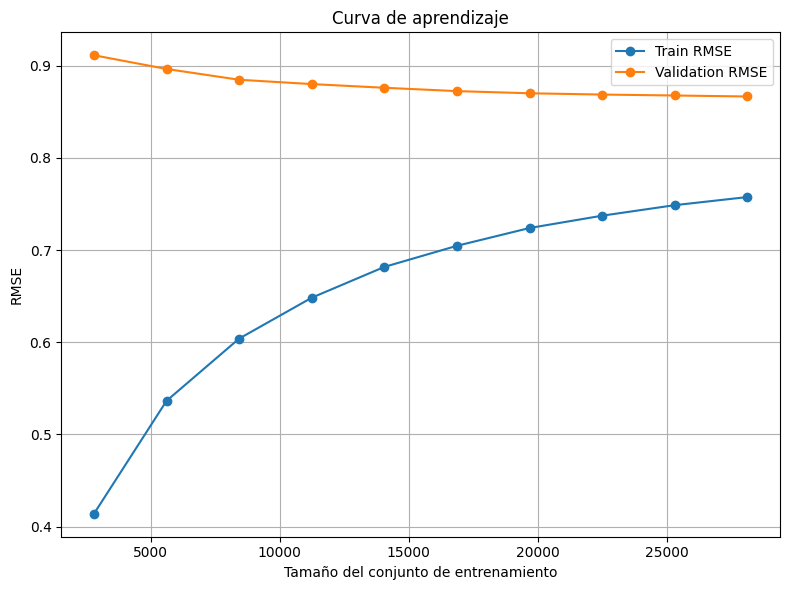

In [14]:
plot_learning_curve(best_lgbm, X_train, y_train)

In [ ]:
# ----pruebas de otros modelos abajo----

In [9]:
df_c = df_limpio.copy()
df_c['popularity_class'] = pd.qcut(df_c['popularity'], q=5, labels=["muy_baja", "baja", "media", "alta", "muy_alta"])
le = LabelEncoder()
df_c['popularity_class_encoded'] = le.fit_transform(df_c['popularity_class'])

X_c = df_c.drop(columns=["popularity", "popularity_class", "mbid", "title", "artist", "release_date"])
X_c = X_c.fillna(X_c.mean(numeric_only=True))
y_c = df_c["popularity_class_encoded"]

X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [6]:
# Modelos de Clasificacion
def evaluar_modelos_clasificacion(X_train, y_train, X_val, y_val):
    modelos_class = {
        "LogisticRegression": LogisticRegression(max_iter=5000),
        "KNN": KNeighborsClassifier(),
        "RandomForest": RandomForestClassifier(random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "SVC": SVC(probability=True),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    modelos_escalados = ["LogisticRegression", "KNN"]
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    resultados_class = {}

    for name, model in modelos_class.items():
        if name in modelos_escalados:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_val_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_val, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

        resultados_class[name] = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1,
        }

    return pd.DataFrame(resultados_class).T.sort_values("F1", ascending=False)

In [15]:
evaluar_modelos_clasificacion(X_train_c, y_train_c, X_val_c, y_val_c)

/home/guillermo/.pyenv/versions/3.10.6/envs/Hitanalyzer/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guillermo/.pyenv/versions/3.10.6/envs/Hitanalyzer/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:35:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9563
[LightGBM] [Info] Number of data points in the train set: 37167, number of used features: 65
[LightGBM] [Info] Start training from score -1.634558
[LightGBM] [Info] Start training from score -1.590172
[LightGBM] [Info] Start training from score -1.592286
[LightGBM] [Info] Start training from score -1.658854
[LightGBM] [Info] Start training from score -1.573811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Accuracy,Precision,Recall,F1
LightGBM,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000
GradientBoosting,1.000000,1.000000,1.000000,1.000000
RandomForest,0.998816,0.998819,0.998816,0.998816
LogisticRegression,0.949634,0.949602,0.949634,0.949265
KNN,0.455553,0.477059,0.455553,0.460535
SVC,0.218145,0.207473,0.218145,0.167625


In [10]:
df_c['popularity_class'].value_counts()

popularity_class
muy_baja    9668
baja        9444
media       9416
alta        9053
muy_alta    8878
Name: count, dtype: int64

In [7]:
# GridSearch para hiperparametros
def gridsearch_modelo(modelo, tipo_modelo, param_grid, X_train, y_train, X_val, y_val, scoring, cv=5):
    grid = GridSearchCV(
        estimator=modelo,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    print("Mejores hiperparametros:", grid.best_params_)
    print("Mejor score:", grid.best_score_)

    best_model = grid.best_estimator_
    y_val_pred = best_model.predict(X_val)

    print("Metricas:")

    if tipo_modelo == "clasificacion":
        acc = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
        rec = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1 Score : {f1:.4f}")

        metricas = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1
        }

    elif tipo_modelo == "regresion":
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)

        print(f"MSE  : {mse:.4f}")
        print(f"RMSE : {rmse:.4f}")
        print(f"MAE  : {mae:.4f}")
        print(f"R2   : {r2:.4f}")

        metricas = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        }

    return best_model, metricas

In [20]:
# Probar gridsearch
best_model, metricas = gridsearch_modelo(
    modelo=RandomForestClassifier(),
    param_grid={"n_estimators": [100, 200]},
    X_train=X_train_c,
    y_train=y_train_c,
    X_val=X_val_c,
    y_val=y_val_c,
    scoring="f1_weighted",
    tipo_modelo="clasificacion"
)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparametros: {'n_estimators': 200}
Mejor score: 0.927116305588893
Metricas:
Accuracy : 0.9333
Precision: 0.9336
Recall   : 0.9333
F1 Score : 0.9333


In [30]:
# Probar random search
param_dist_reg = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_model, metricas = randomsearch_modelo(
    modelo=RandomForestRegressor(),
    param_dist=param_dist_reg,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scoring="neg_mean_squared_error",
    tipo_modelo="regresion"
)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores hiperparametros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Mejor score: -0.7226293019246143
Metricas:
MSE  : 0.7023
RMSE : 0.8380
MAE  : 0.6701
R2   : 0.2967


In [ ]:
def plot_feature_importance(model, X, top_n=20):
    importancias = model.feature_importances_
    features = pd.Series(importancias, index=X.columns)
    features_top = features.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_top.values, y=features_top.index, palette="viridis")
    plt.title(f"Top {top_n} Features más importantes")
    plt.xlabel("Importancia")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1686/796590176.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_top.values, y=features_top.index, palette="viridis")


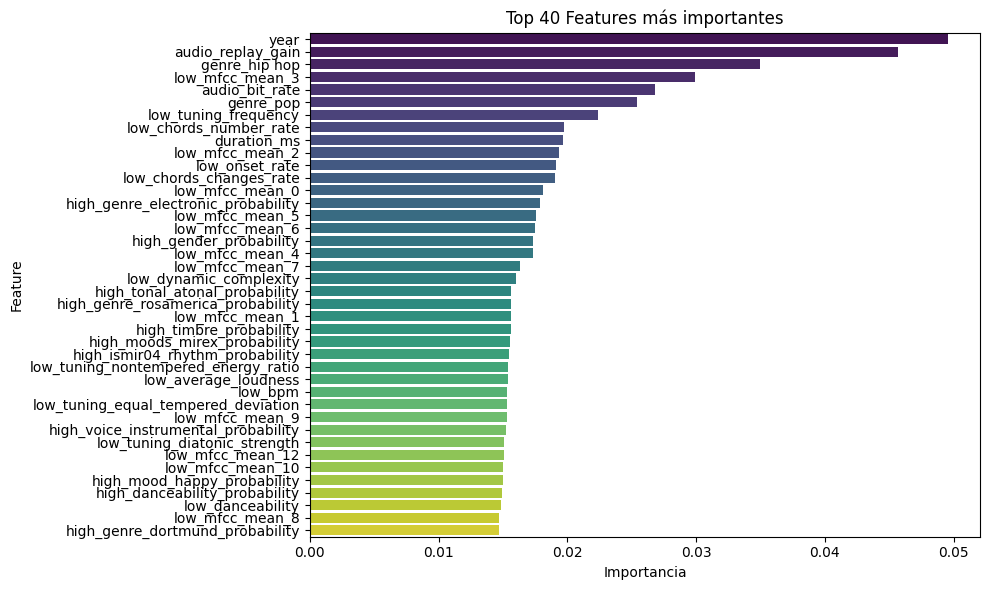

In [37]:
plot_feature_importance(best_model, X_train, top_n=40)